In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")

In [3]:
df.shape

(100000, 24)

In [4]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [5]:
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].fillna("unknown")

In [6]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("unknown")

In [7]:
df["AMT_INCOME_TOTAL"]

0        202500.0
1        270000.0
2         67500.0
3        135000.0
4        121500.0
           ...   
99995    157500.0
99996    225000.0
99997    135000.0
99998    135000.0
99999    202500.0
Name: AMT_INCOME_TOTAL, Length: 100000, dtype: float64

In [8]:
df["AMT_INCOME_TOTAL"].value_counts()

135000.0    11695
112500.0    10020
157500.0     8664
180000.0     8021
90000.0      7293
            ...  
87007.5         1
150385.5        1
152694.0        1
141727.5        1
225112.5        1
Name: AMT_INCOME_TOTAL, Length: 1212, dtype: int64

In [9]:
def income(i):
    if i <= 500000:
        return "Low Income"
    elif i > 500000 and i <= 1000000:
        return "Average Income"
    else:
        return "High Income"

In [10]:
df["Income_Category"] = df["AMT_INCOME_TOTAL"].apply(income)

In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,Income_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1,Low Income
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1,1,0,1,0,Core staff,2.0,MONDAY,1,Low Income
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,1,0,Laborers,1.0,MONDAY,0,Low Income
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1,Low Income
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,1,0,1,0,Core staff,1.0,THURSDAY,1,Low Income


In [12]:
a = df[df["AMT_INCOME_TOTAL"]>200000]

In [13]:
a["TARGET"].value_counts()

0    26484
1     2027
Name: TARGET, dtype: int64

In [14]:
b = df[df["AMT_INCOME_TOTAL"]<=200000]


In [15]:
v_count = b["TARGET"].value_counts()
v_count

0    65423
1     6066
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x1d0ca68aac0>,
 [Text(-1.0611478047982135, 0.28976772831344216, '0'),
  Text(1.0611478047982132, -0.2897677283134427, '1')],
 [Text(-0.5788078935262981, 0.1580551245346048, '91.51%'),
  Text(0.5788078935262981, -0.1580551245346051, '8.49%')])

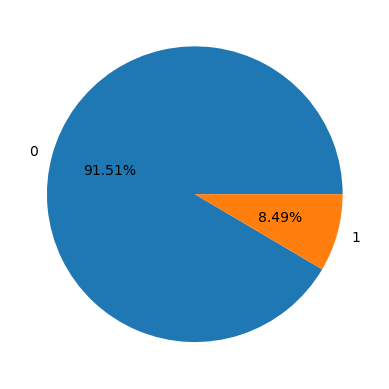

In [16]:
plt.pie(v_count, labels =  v_count.index, autopct="%.2f%%")

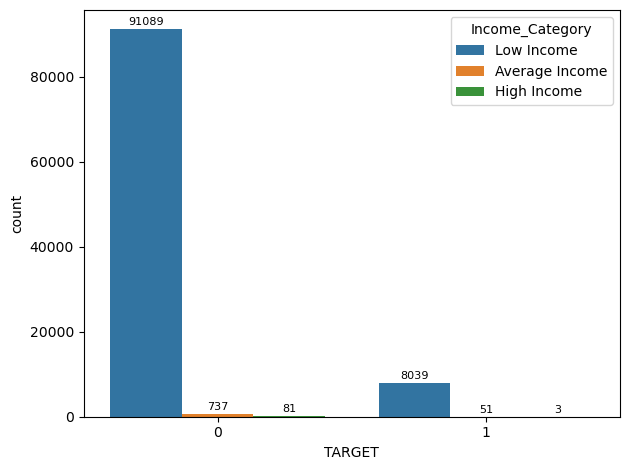

In [17]:


ax = sns.countplot(x="TARGET", hue="Income_Category", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.savefig('my_plot.png')


plt.show()


In [18]:
df["DAYS_EMPLOYED"]

0        -637
1       -1188
2        -225
3       -3039
4       -3038
         ... 
99995    -232
99996    -182
99997   -4805
99998    -340
99999   -3230
Name: DAYS_EMPLOYED, Length: 100000, dtype: int64

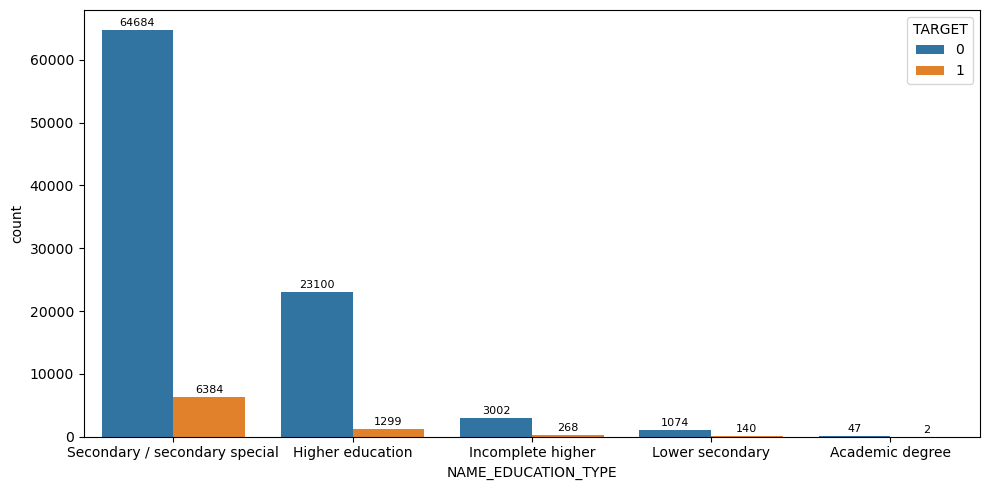

In [19]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.savefig('education.png')

plt.tight_layout()

plt.show()

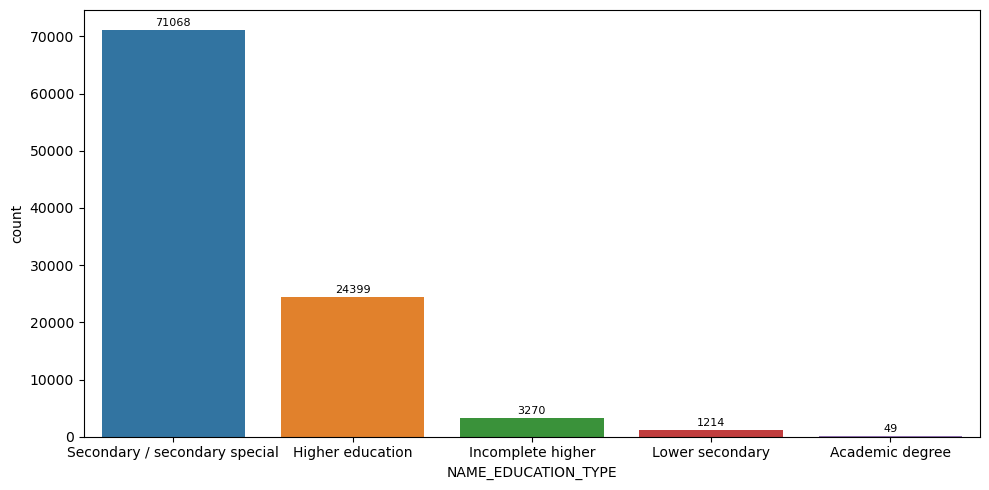

In [20]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [21]:
c = df.corr()

<AxesSubplot:>

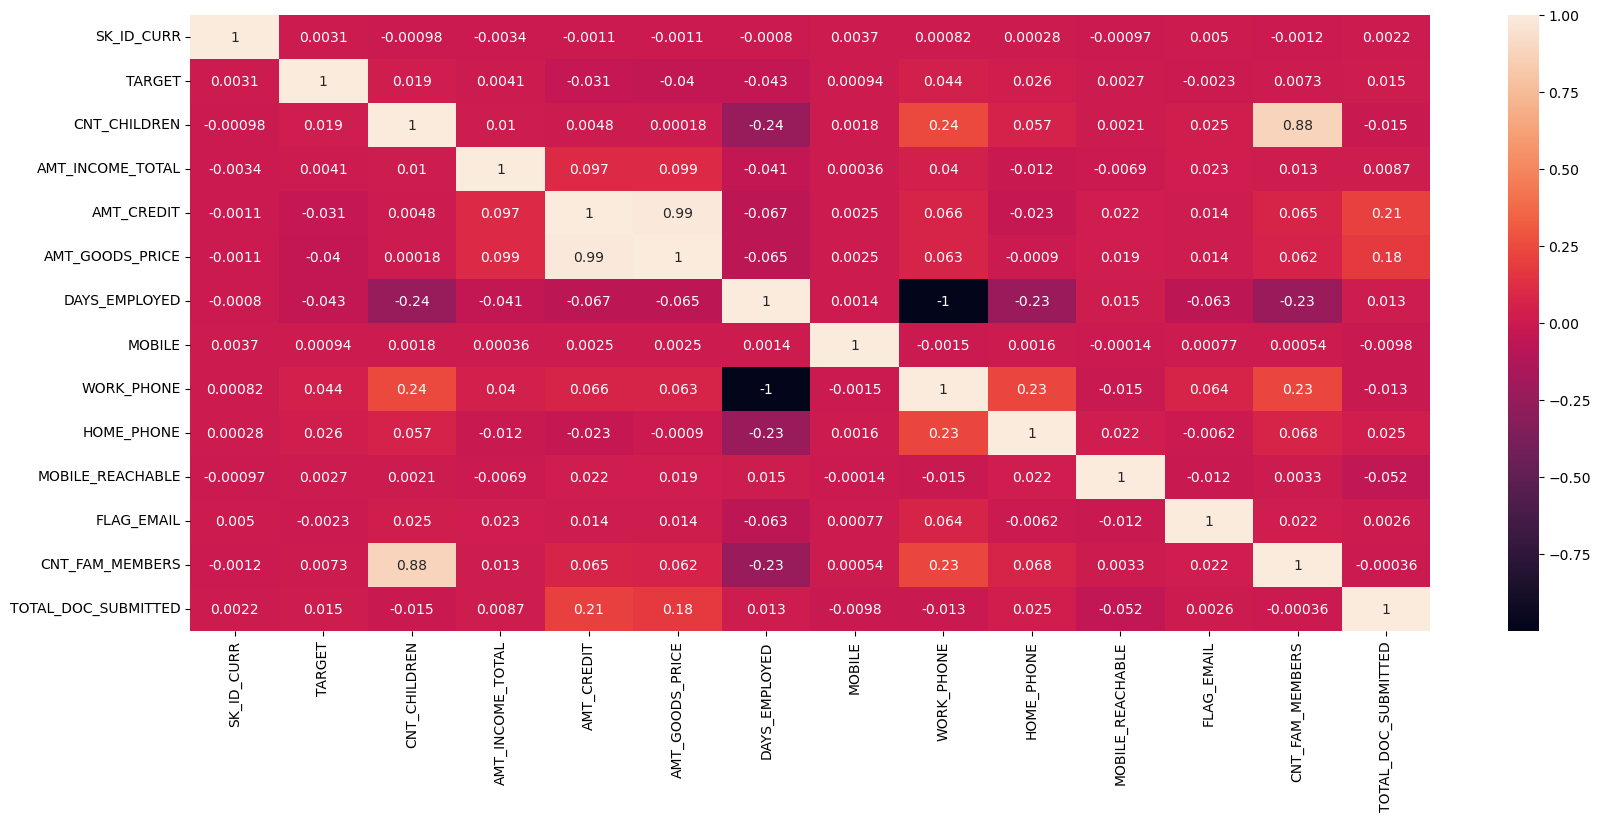

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(c, annot = True)


In [23]:
df["DAYS_EMPLOYED"].value_counts()

 365243    17865
-230          56
-139          50
-212          50
-205          48
           ...  
-15043         1
-13285         1
-7844          1
-7835          1
-4059          1
Name: DAYS_EMPLOYED, Length: 9871, dtype: int64

In [35]:
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].abs()

In [36]:
def status(i):
    if i < 365:
        return "Less than one year"
    elif i >= 365 and i <= 1825:
        return "1 year to 5 years"
    elif i >= 1825 and i <= 3650:
        return "5 years to 10 years"
    else:
        return "More than 10 years"

In [37]:
df["Employment_Status"] = df["DAYS_EMPLOYED"].apply(status)

In [38]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,Income_Category,Employment_Status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,1,0,1,0,Laborers,1.0,WEDNESDAY,1,Low Income,1 year to 5 years
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1,0,1,0,Core staff,2.0,MONDAY,1,Low Income,1 year to 5 years
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,0,Laborers,1.0,MONDAY,0,Low Income,Less than one year
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,0,1,0,Laborers,2.0,WEDNESDAY,1,Low Income,5 years to 10 years
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,0,1,0,Core staff,1.0,THURSDAY,1,Low Income,5 years to 10 years


In [ ]:
e_count

In [ ]:
plt.pie(e_count, labels = e_count.index, autopct="%.2f%%", explode = [0,0.1,0.1,0.1])

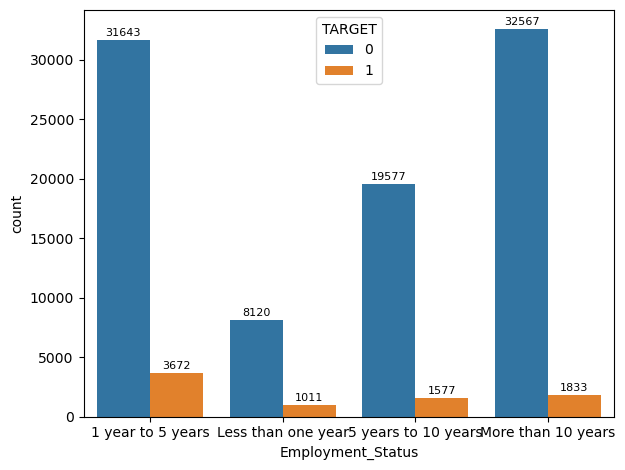

In [33]:

ax = sns.countplot(x="Employment_Status", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

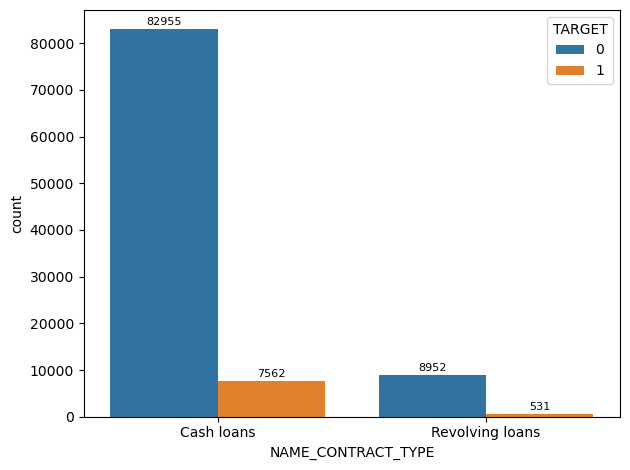

In [39]:

ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:

ax = sns.countplot(x="NAME_CONTRACT_TYPE", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:
df[df["NAME_EDUCATION_TYPE"] == "Secondary / secondary special"]

In [ ]:

ax = sns.countplot(x="TOTAL_DOC_SUBMITTED", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:
doc = df[df["TOTAL_DOC_SUBMITTED"]!=0]

In [ ]:
doc_count = doc["TARGET"].value_counts()

In [ ]:
plt.pie(doc_count, labels = doc_count.index, autopct="%.2f%%", explode = [0.1,0.1])

In [ ]:
d = df[df["TOTAL_DOC_SUBMITTED"]>=2]
c = d["TARGET"].value_counts()
plt.pie(c,labels=c.index,autopct="%.2f%%")

In [ ]:
df["AMT_CREDIT"]

In [50]:
def credit(i):
    if i <=500000:
        return "low credit"
    elif i >= 500000 and i <= 1000000:
        return "average credit"
    else:
        return "high credit"

In [51]:
df["Loan_status"] = df["AMT_CREDIT"].apply(credit)

In [52]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,Income_Category,Employment_Status,Loan_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0,1,0,Laborers,1.0,WEDNESDAY,1,Low Income,1 year to 5 years,low credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0,1,0,Core staff,2.0,MONDAY,1,Low Income,1 year to 5 years,high credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,0,Laborers,1.0,MONDAY,0,Low Income,Less than one year,low credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0,1,0,Laborers,2.0,WEDNESDAY,1,Low Income,5 years to 10 years,low credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0,1,0,Core staff,1.0,THURSDAY,1,Low Income,5 years to 10 years,average credit


In [ ]:
l_count = df["Loan_status"].value_counts()

In [ ]:
plt.pie(l_count, labels = l_count.index, autopct="%.2f%%", explode = [0.1,0.1,0.1])

In [ ]:
sns.set_style("darkgrid")
sns.distplot(x =  df["AMT_CREDIT"], kde = False, color = "green", bins = 50)

In [ ]:

ax = sns.countplot(x="Loan_status", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:
sns.stripplot(x = df["Income_Category"], y = df["AMT_CREDIT"], data =df, jitter = True, hue = df["Loan_status"], split = True)

In [ ]:
df["NAME_INCOME_TYPE"].unique()

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:

ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_EDUCATION_TYPE", data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()

plt.show()

In [ ]:
plt.scatter(df["Income_Category"], df["AMT_CREDIT"])

In [ ]:
ax = sns.barplot(df["GENDER"], df["AMT_CREDIT"], ci=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [28]:
final = df[(df["AMT_INCOME_TOTAL"]>=150000)&(df["Employment_Status"]!= "Less than one year")&
   (df["TOTAL_DOC_SUBMITTED"]!=0)&(df["AMT_CREDIT"]>=150000)&(df["NAME_INCOME_TYPE"]!= "Unemployed")]

In [32]:
final.to_excel("final_new.xlsx")

In [ ]:
final["TARGET"].value_counts()

In [ ]:
df[(df["AMT_INCOME_TOTAL"]>=200000)&(df["Employment_Status"]!= "Less than one year")&
   (df["TOTAL_DOC_SUBMITTED"]!=0)&(df["AMT_CREDIT"]>200000)&(df["NAME_INCOME_TYPE"]!= "Unemployed")]

In [44]:
ac = df[["CNT_CHILDREN","TARGET"]]

In [45]:
ac.corr()

,CNT_CHILDREN,TARGET
CNT_CHILDREN,1.000000,0.018616
TARGET,0.018616,1.000000


In [43]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED',
       'Income_Category', 'Employment_Status'],
      dtype='object')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

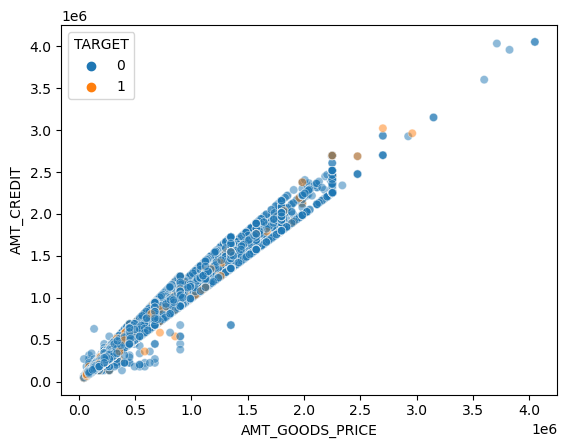

In [48]:
sns.scatterplot(df["AMT_GOODS_PRICE"],df["AMT_CREDIT"], hue = df["TARGET"],alpha = 0.5)